
Copyright (C) 2024 - 2026 ANSYS, Inc. and/or its affiliates.
SPDX-License-Identifier: Apache-2.0


Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

# Read RCS metadata

This example demonstrates how to use the ``ToolkitBackend`` class.
It initiates AEDT through PyAEDT, opens an HFSS design, and proceeds to get the RCS data.

## Perform required imports

In [1]:
from ansys.aedt.toolkits.radar_explorer.rcs_visualization import MonostaticRCSData
from ansys.aedt.toolkits.radar_explorer.rcs_visualization import MonostaticRCSPlotter

## Get metadata

In [2]:
metadata = r"..\example_models\rcs_data\VV_Trihedral_RCS.json"

## Load RCS

In [3]:
rcs_data = MonostaticRCSData(metadata)

## Get RCS data

In [4]:
data_active_frequency = rcs_data.rcs_active_frequency
data_active_theta = rcs_data.rcs_active_theta
data_active_phi = rcs_data.rcs_active_phi
data_active_theta_phi = rcs_data.rcs_active_theta_phi
data = rcs_data.rcs

## Load RCS plotter

In [5]:
rcs_data_plotter = MonostaticRCSPlotter(rcs_data)

## Plot incident first incident wave theta

In [6]:
primary_sweep = "IWavePhi"
secondary_sweep_value = rcs_data.available_incident_wave_theta[0]

## Plot RCS

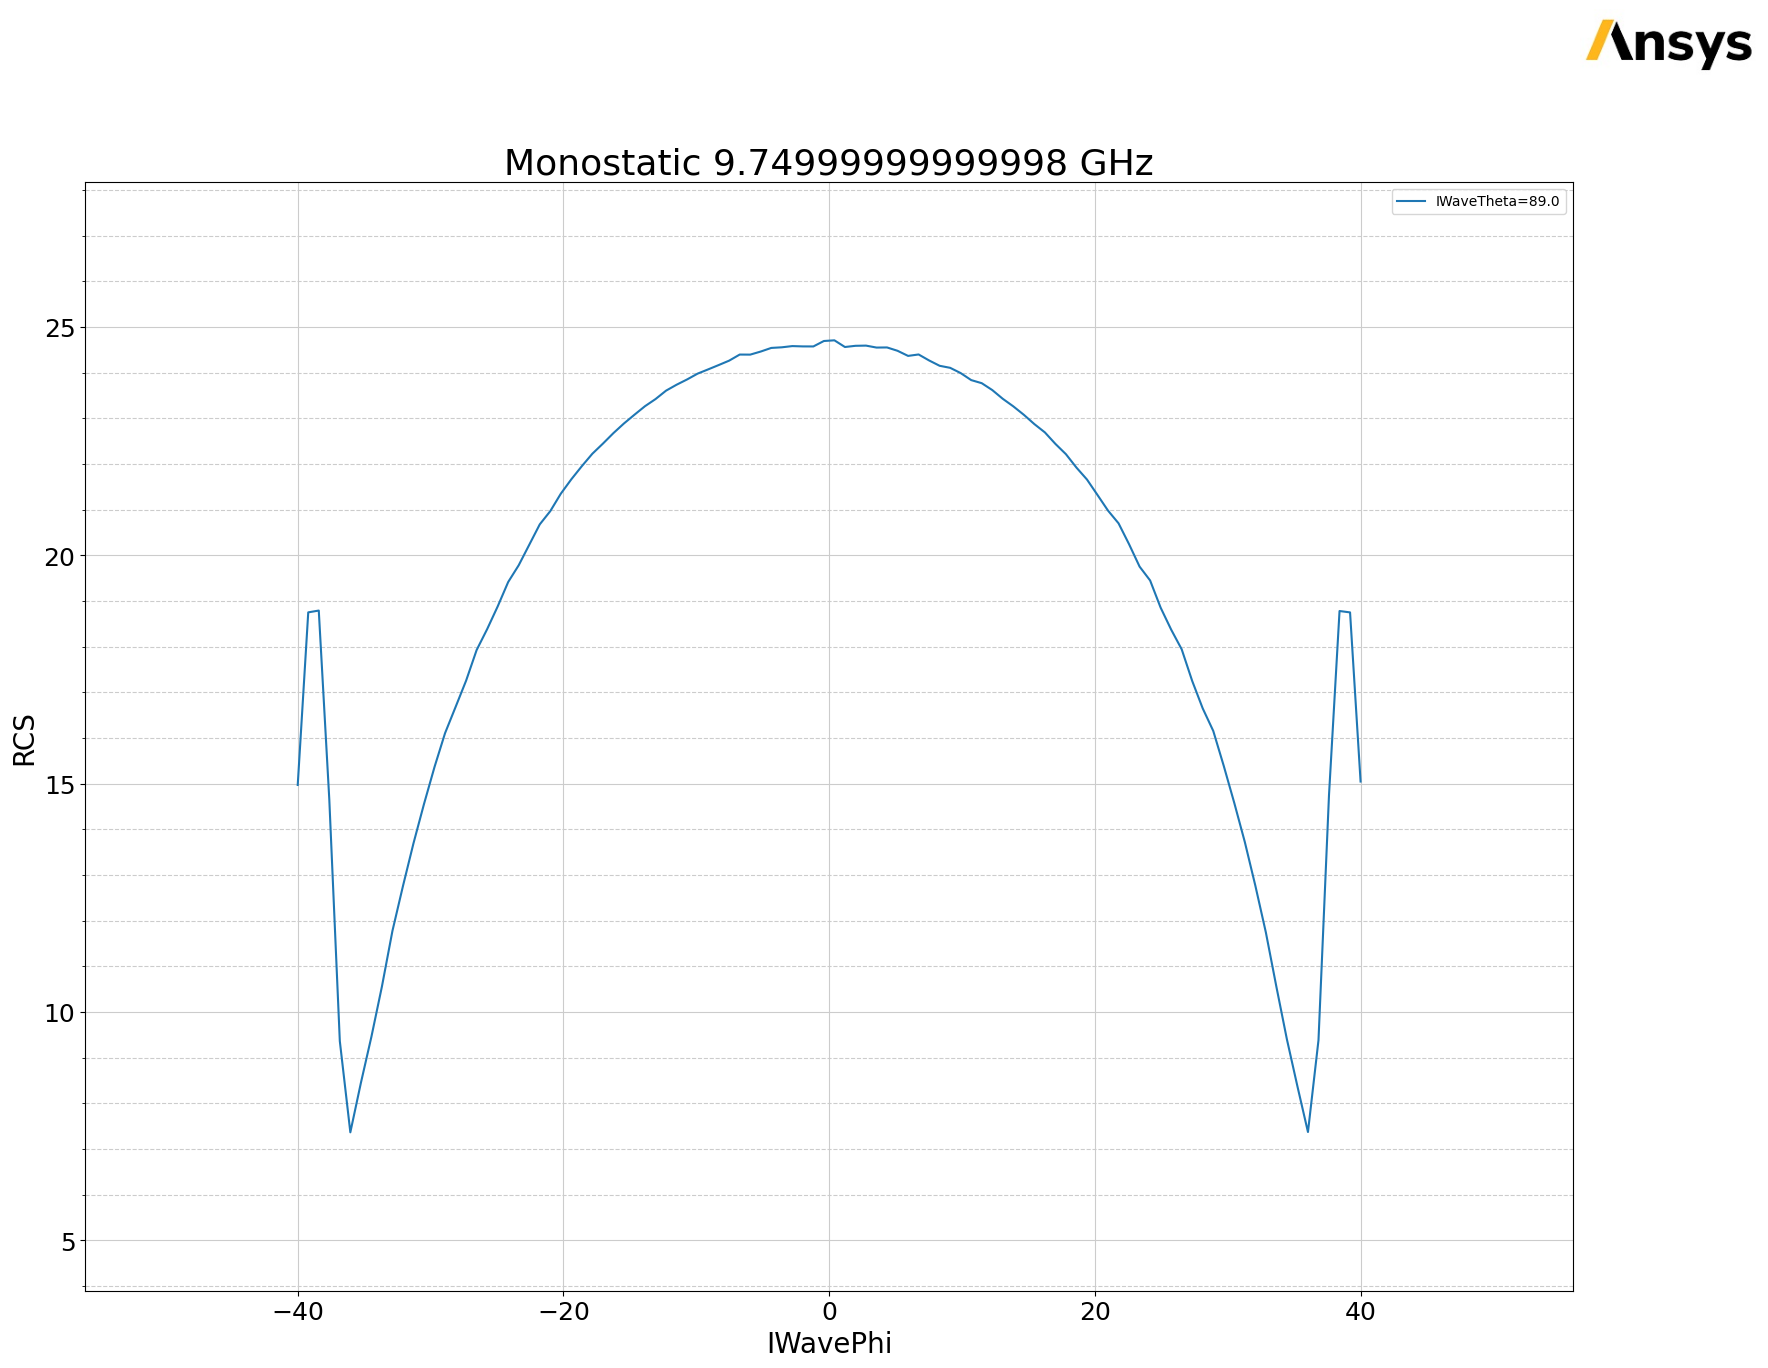

In [7]:
freq = rcs_data_plotter.rcs_data.frequency
rcs_plot_1 = rcs_data_plotter.plot_rcs(
    primary_sweep=primary_sweep, secondary_sweep_value=secondary_sweep_value, title=f"Monostatic {freq} GHz", show=False
)

## Plot last frequency RCS

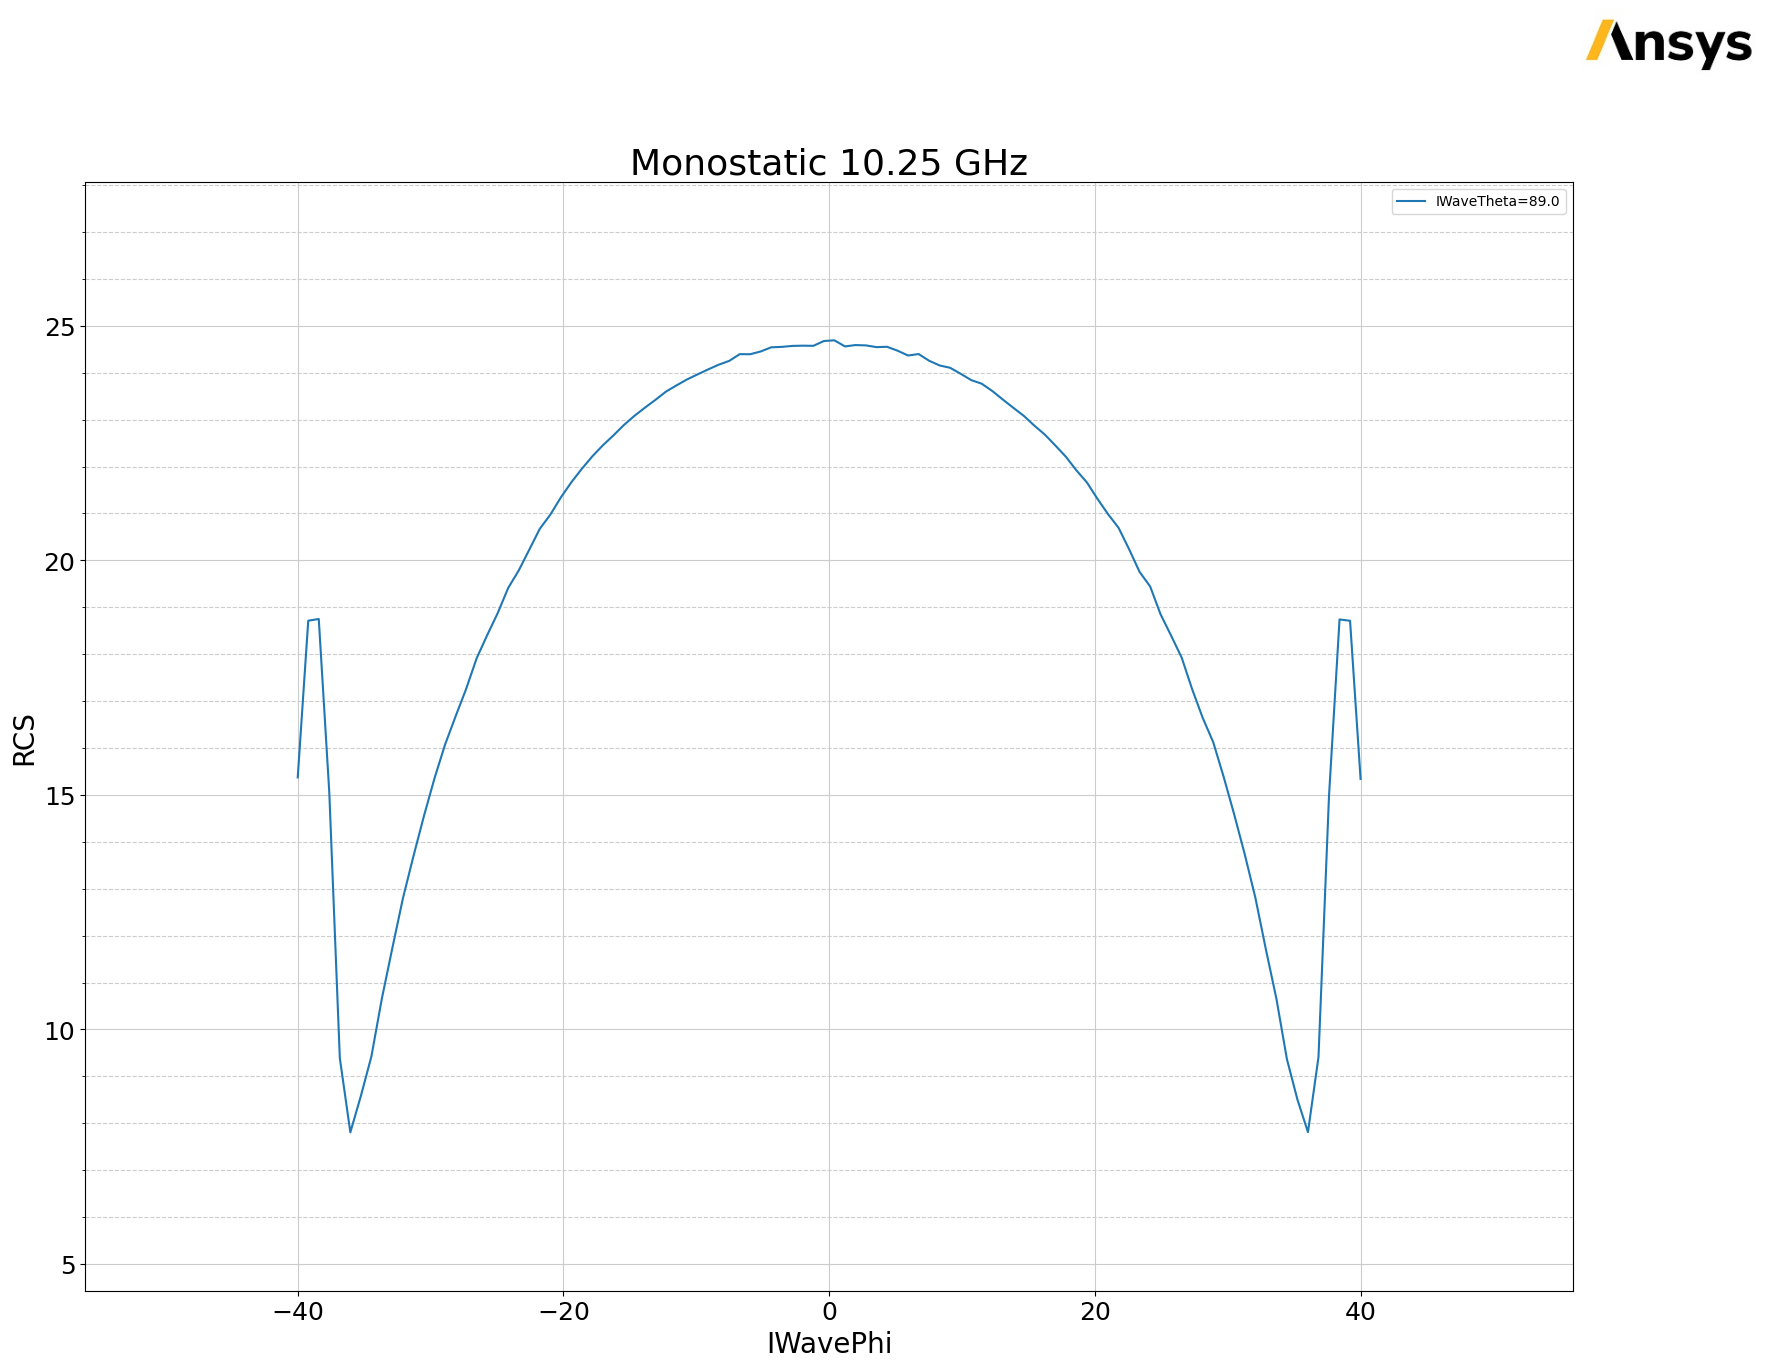

In [8]:
rcs_data_plotter.rcs_data.frequency = rcs_data_plotter.rcs_data.frequencies[-1]
freq = rcs_data_plotter.rcs_data.frequency
rcs_plot_2 = rcs_data_plotter.plot_rcs(
    primary_sweep=primary_sweep, secondary_sweep_value=secondary_sweep_value, title=f"Monostatic {freq} GHz"
)

## Plot polar RCS

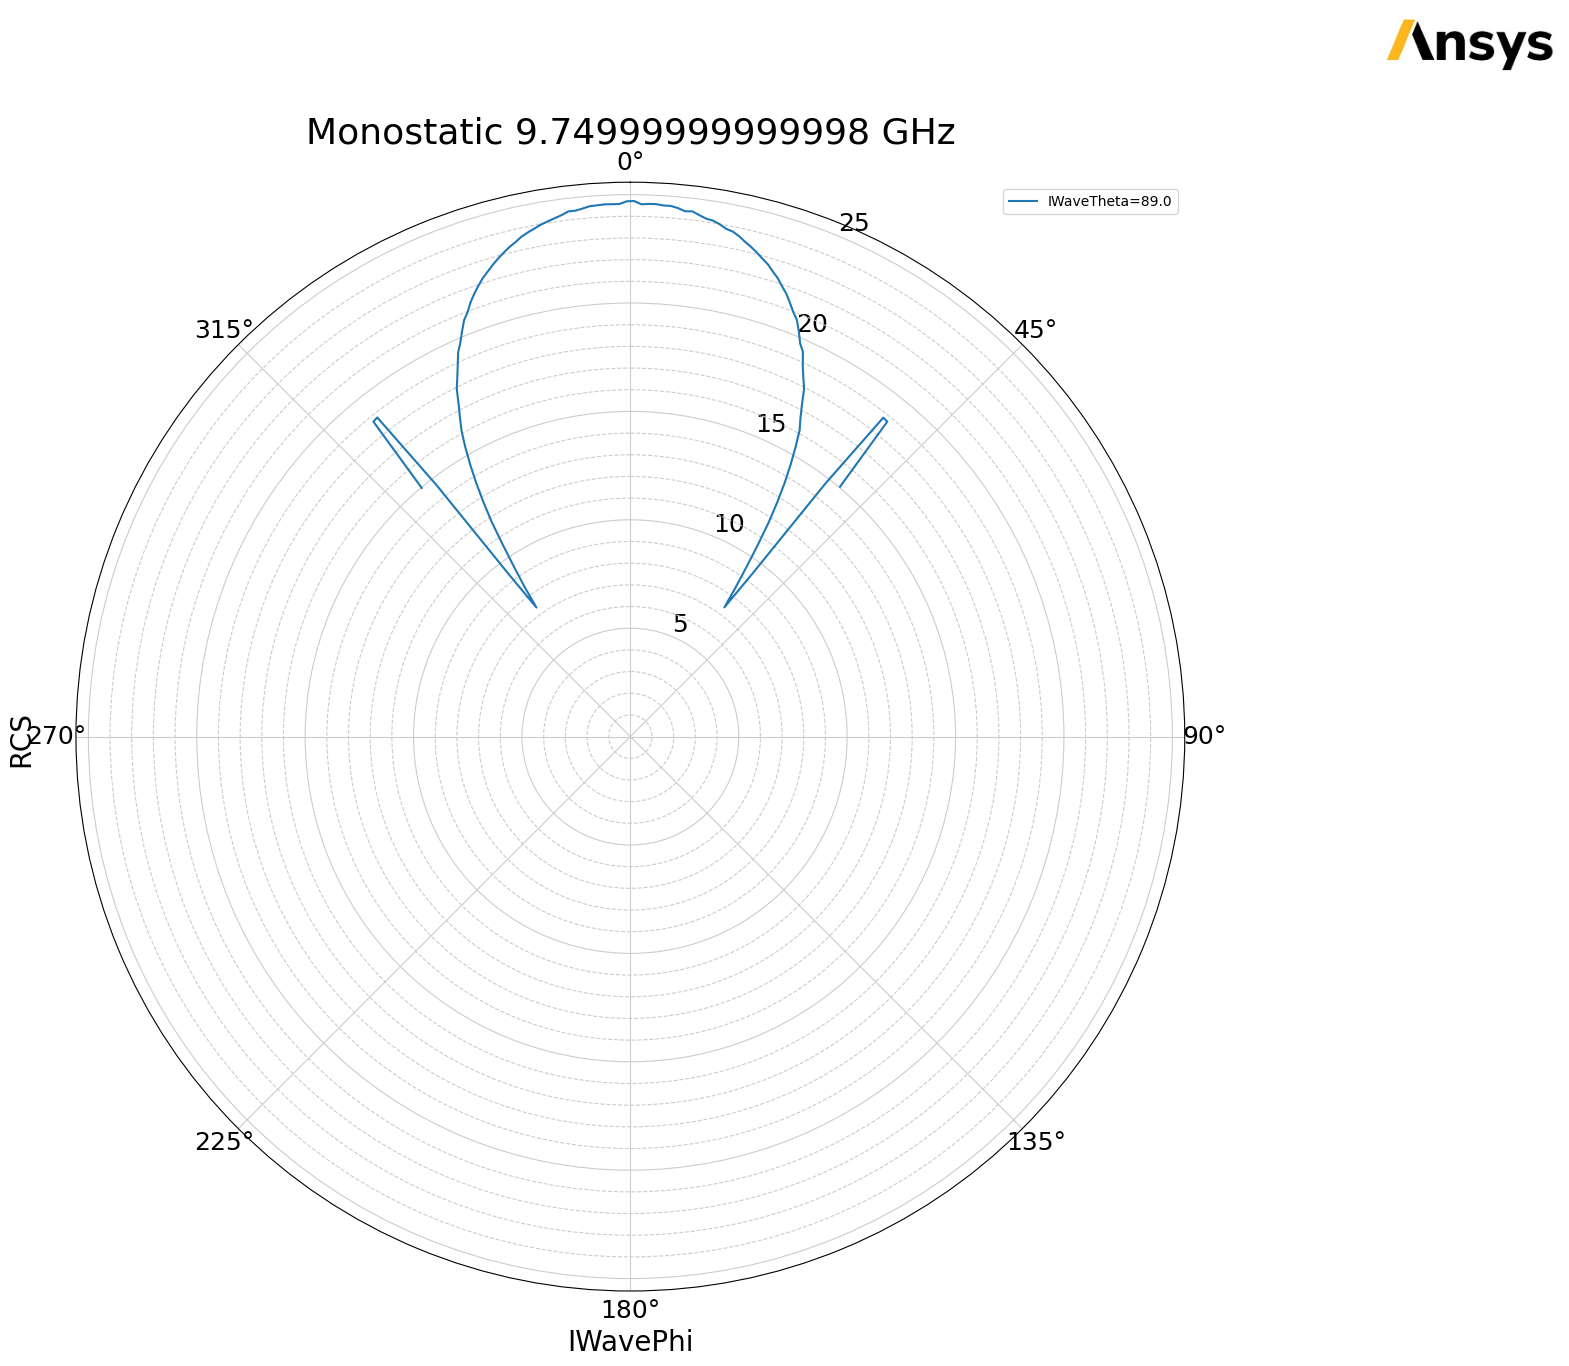

In [9]:
rcs_data_plotter.rcs_data.frequency = rcs_data_plotter.rcs_data.frequencies[0]
freq = rcs_data_plotter.rcs_data.frequency
rcs_plot_polar = rcs_data_plotter.plot_rcs(
    primary_sweep=primary_sweep,
    secondary_sweep_value=secondary_sweep_value,
    is_polar=True,
    title=f"Monostatic {freq} GHz",
)

## Plot three incident wave theta

In [10]:
primary_sweep = "IWavePhi"
secondary_sweep_value = rcs_data_plotter.rcs_data.available_incident_wave_theta[0:3]
rcs_data_plotter.rcs_data.data_conversion_function = "abs"

Plot RCS

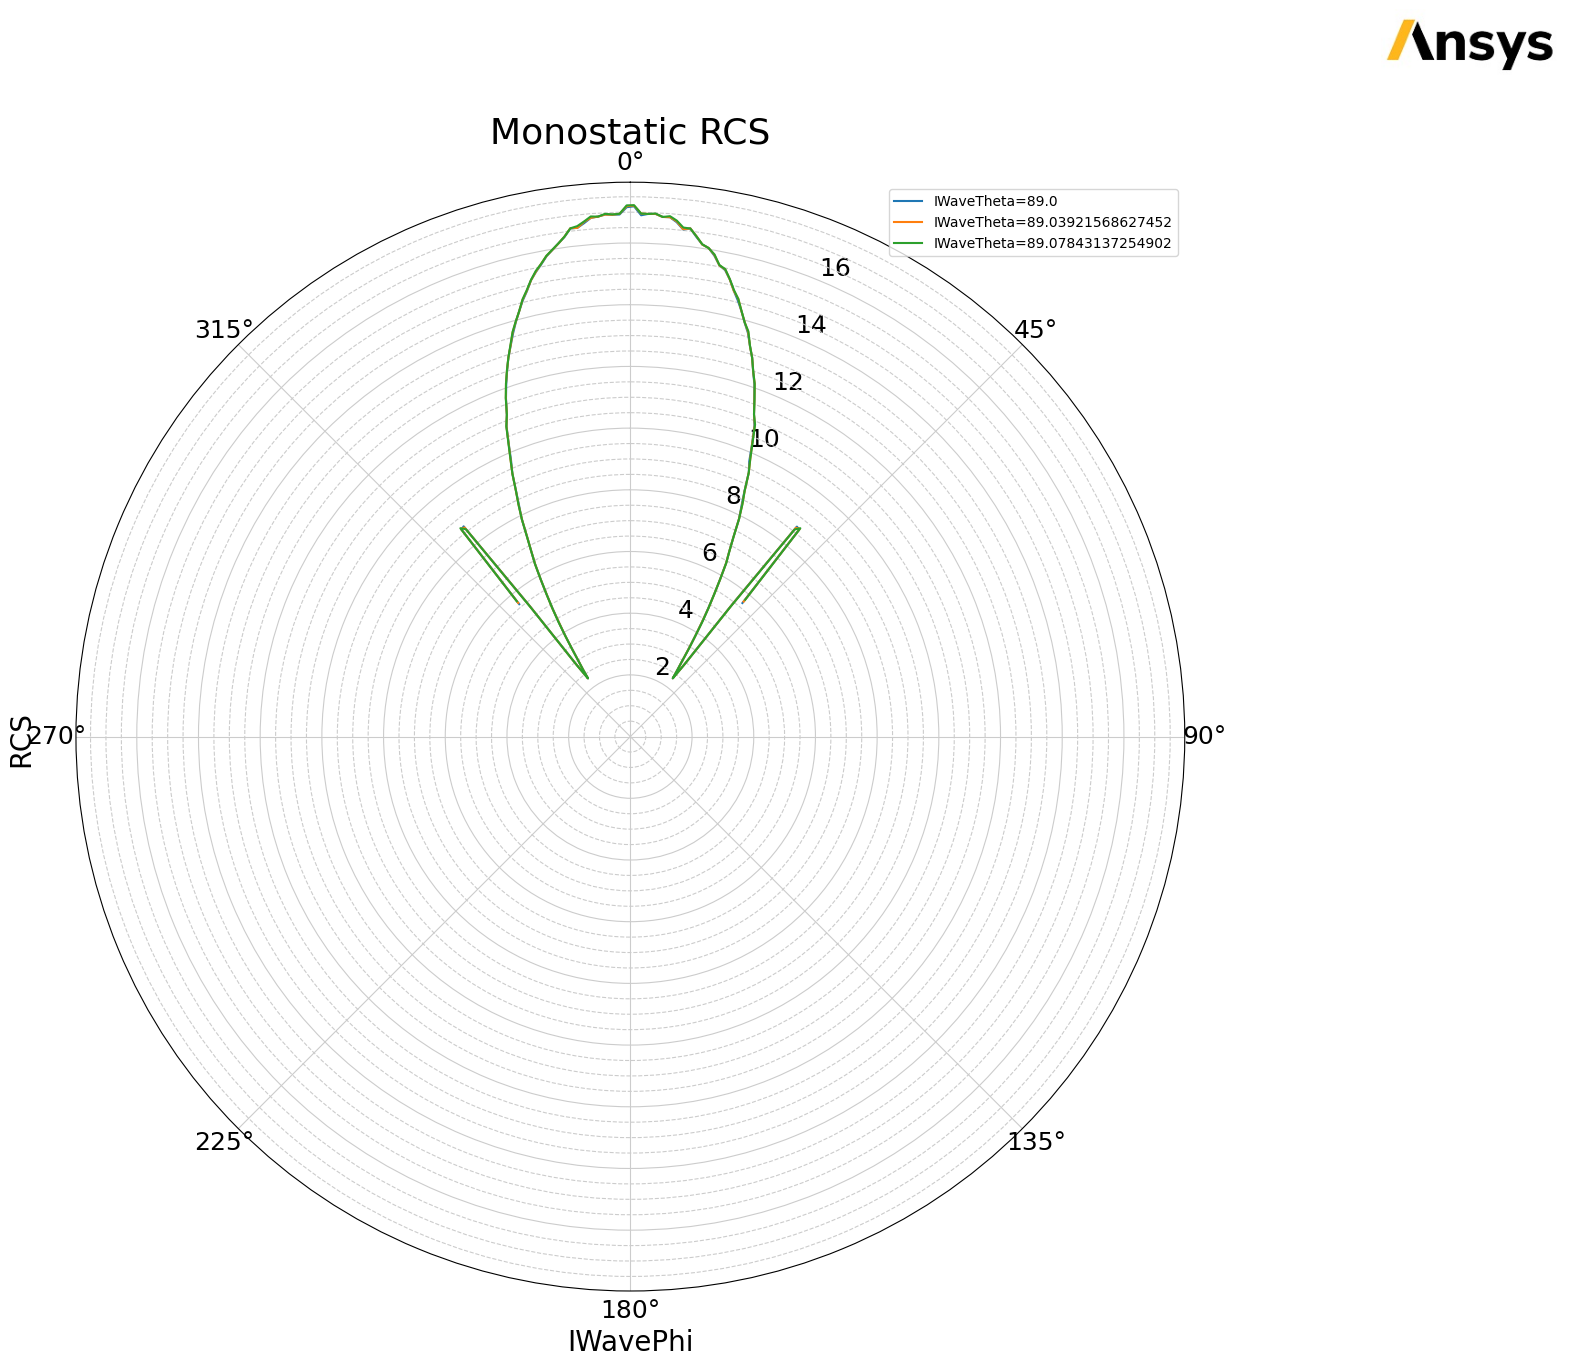

In [11]:
rcs_plot_3 = rcs_data_plotter.plot_rcs(
    primary_sweep=primary_sweep, secondary_sweep_value=secondary_sweep_value, is_polar=True
)

## Plot all incident incident wave phi

In [12]:
primary_sweep = "IWaveTheta"

Plot RCS

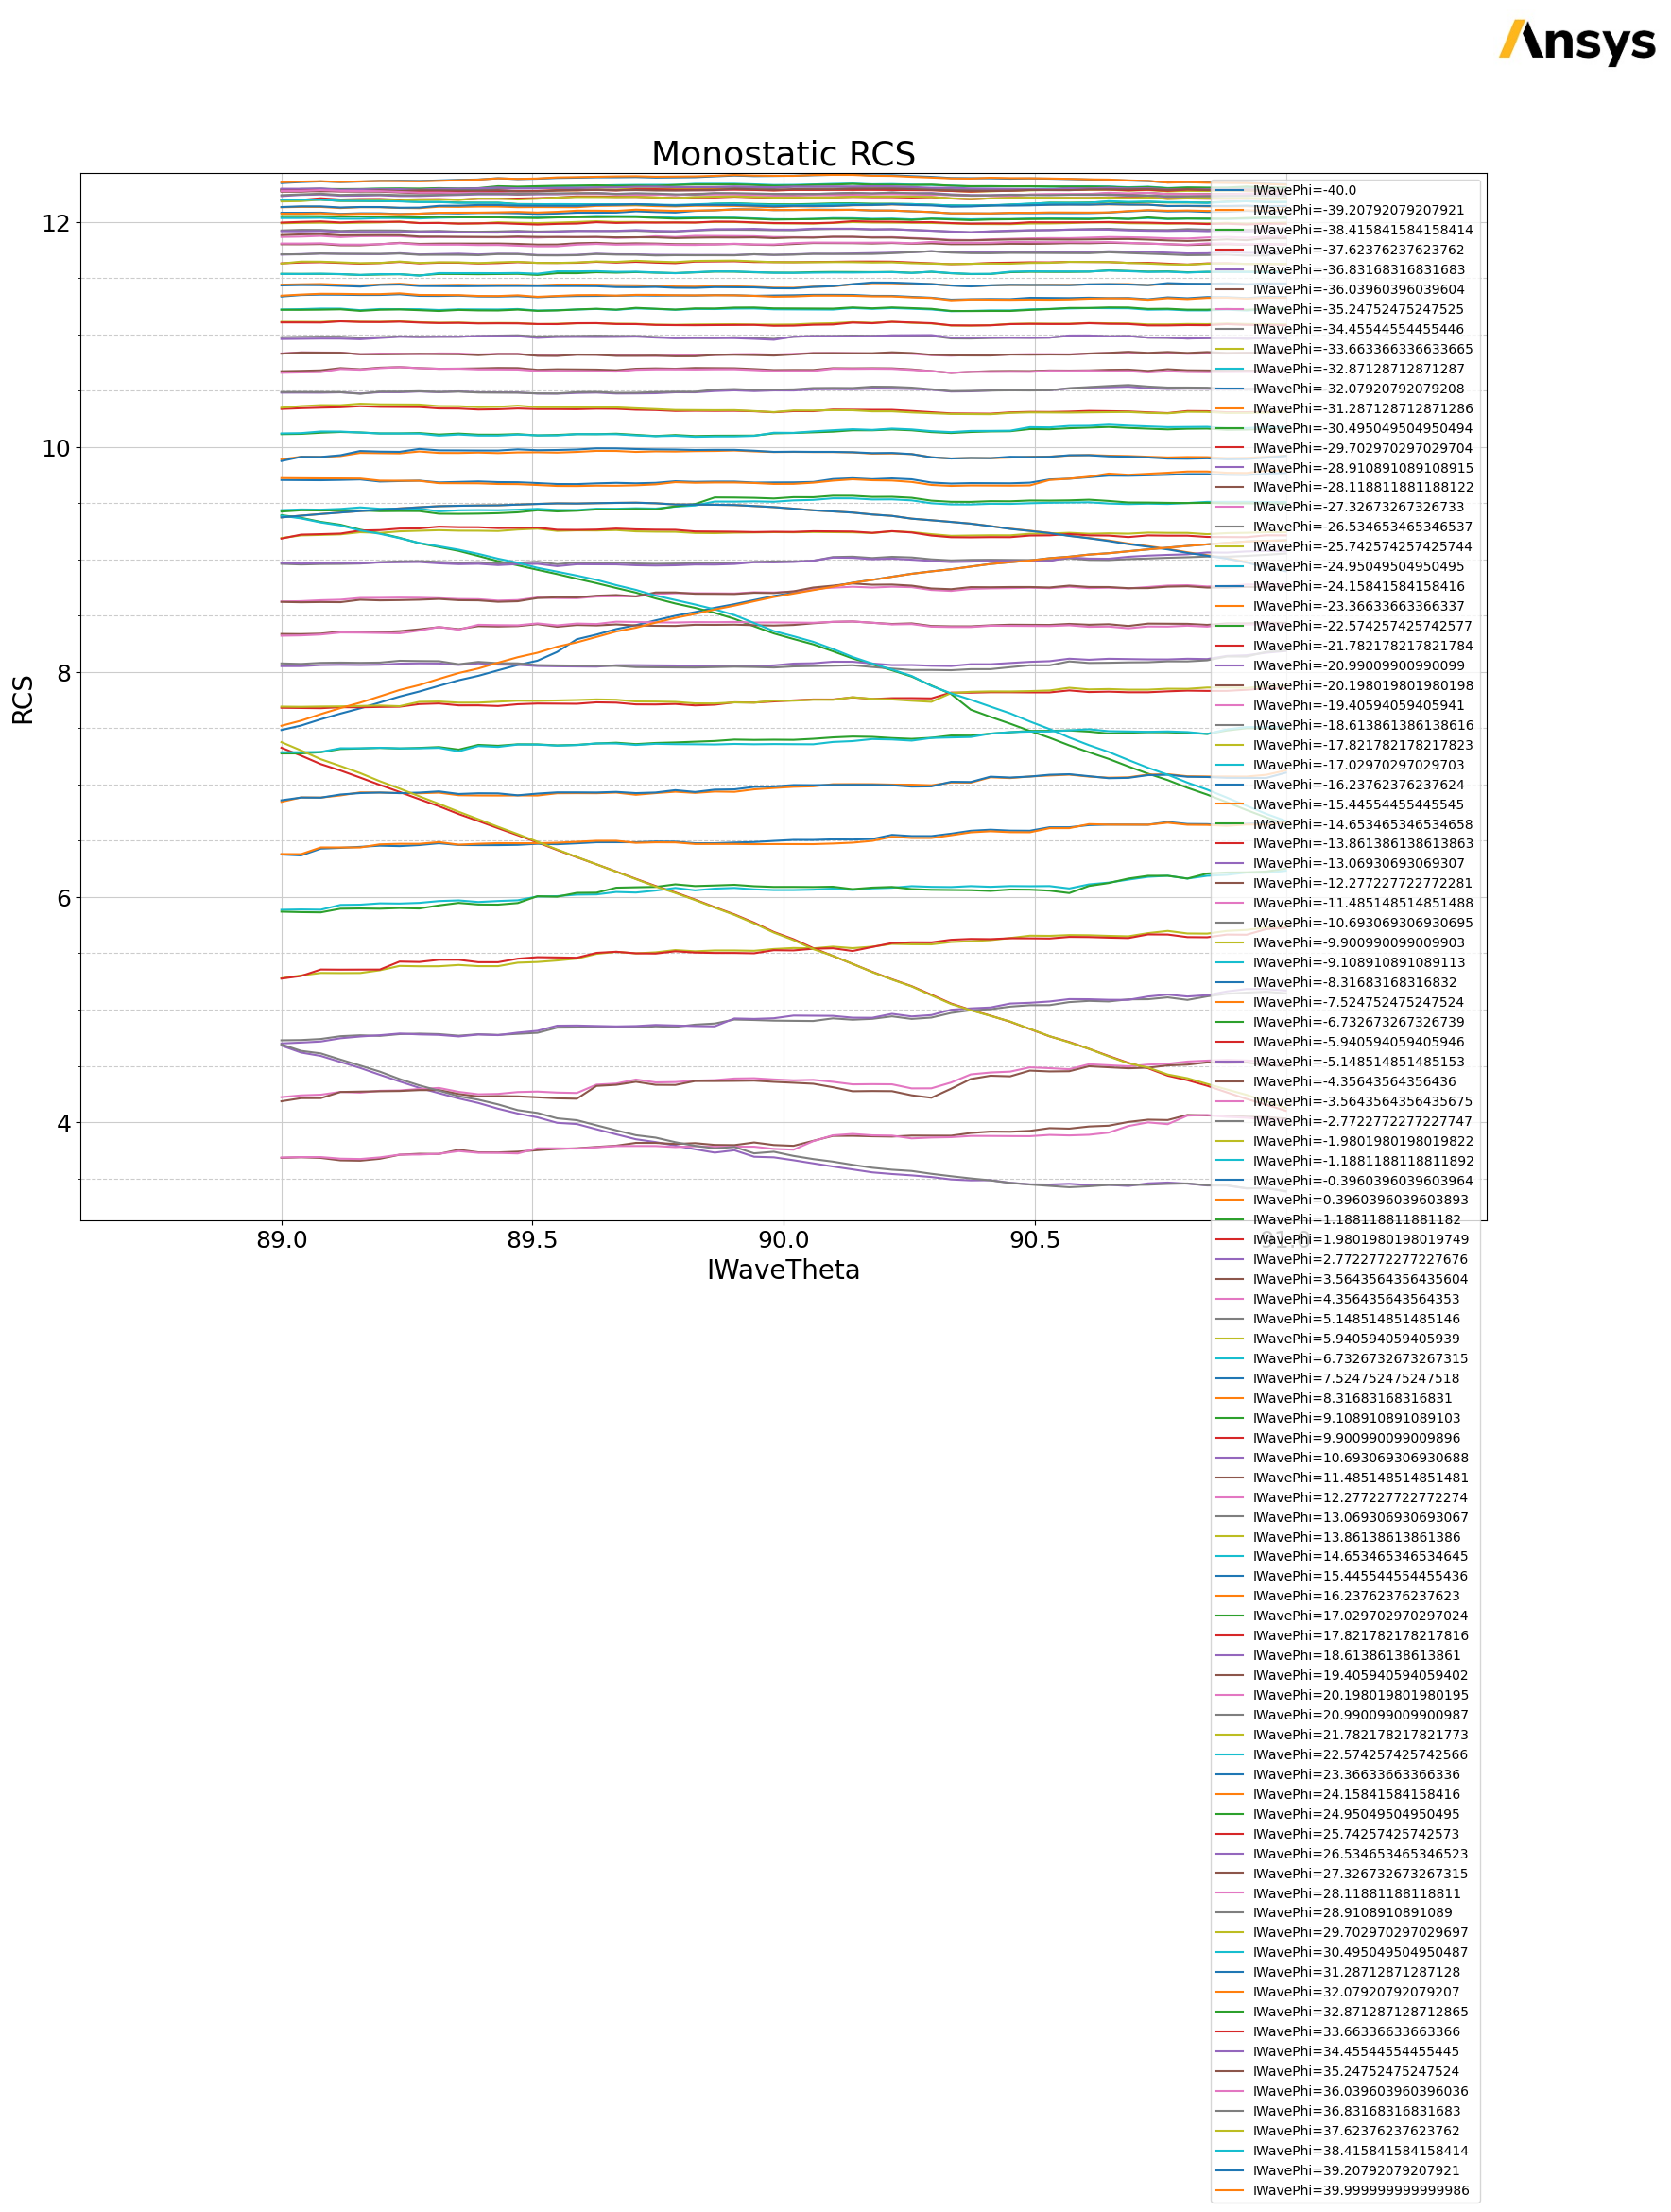

In [13]:
rcs_data_plotter.rcs_data.data_conversion_function = "dB10"
rcs_plot_4 = rcs_data_plotter.plot_rcs(primary_sweep=primary_sweep, secondary_sweep_value="all")

## Plot over frequency

In [14]:
primary_sweep = "Freq"

Plot RCS

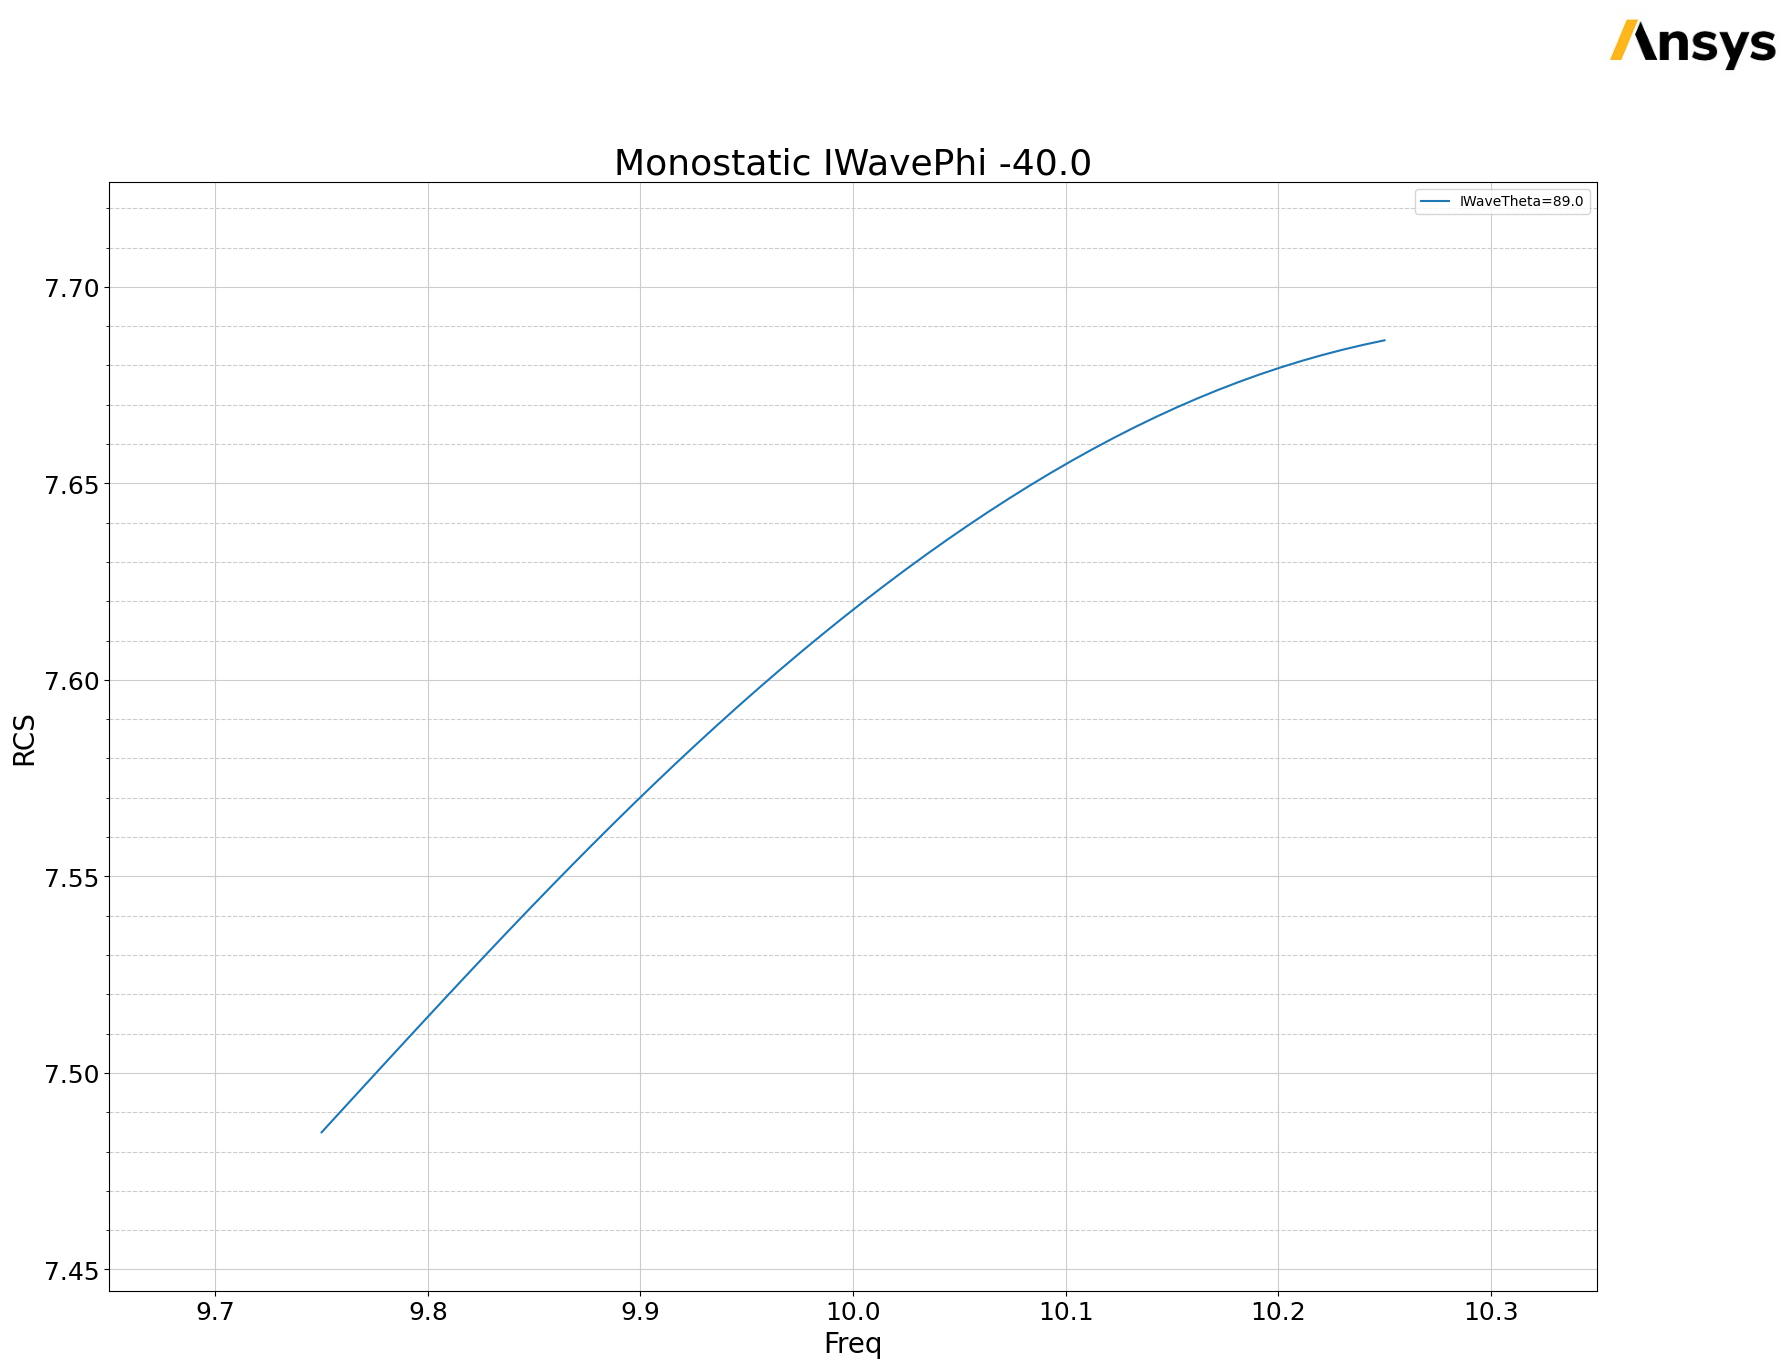

In [15]:
iwavephi = rcs_data_plotter.rcs_data.incident_wave_phi
rcs_plot_5 = rcs_data_plotter.plot_rcs(
    primary_sweep=primary_sweep,
    title=f"Monostatic IWavePhi {iwavephi}",
)

Plot RCS

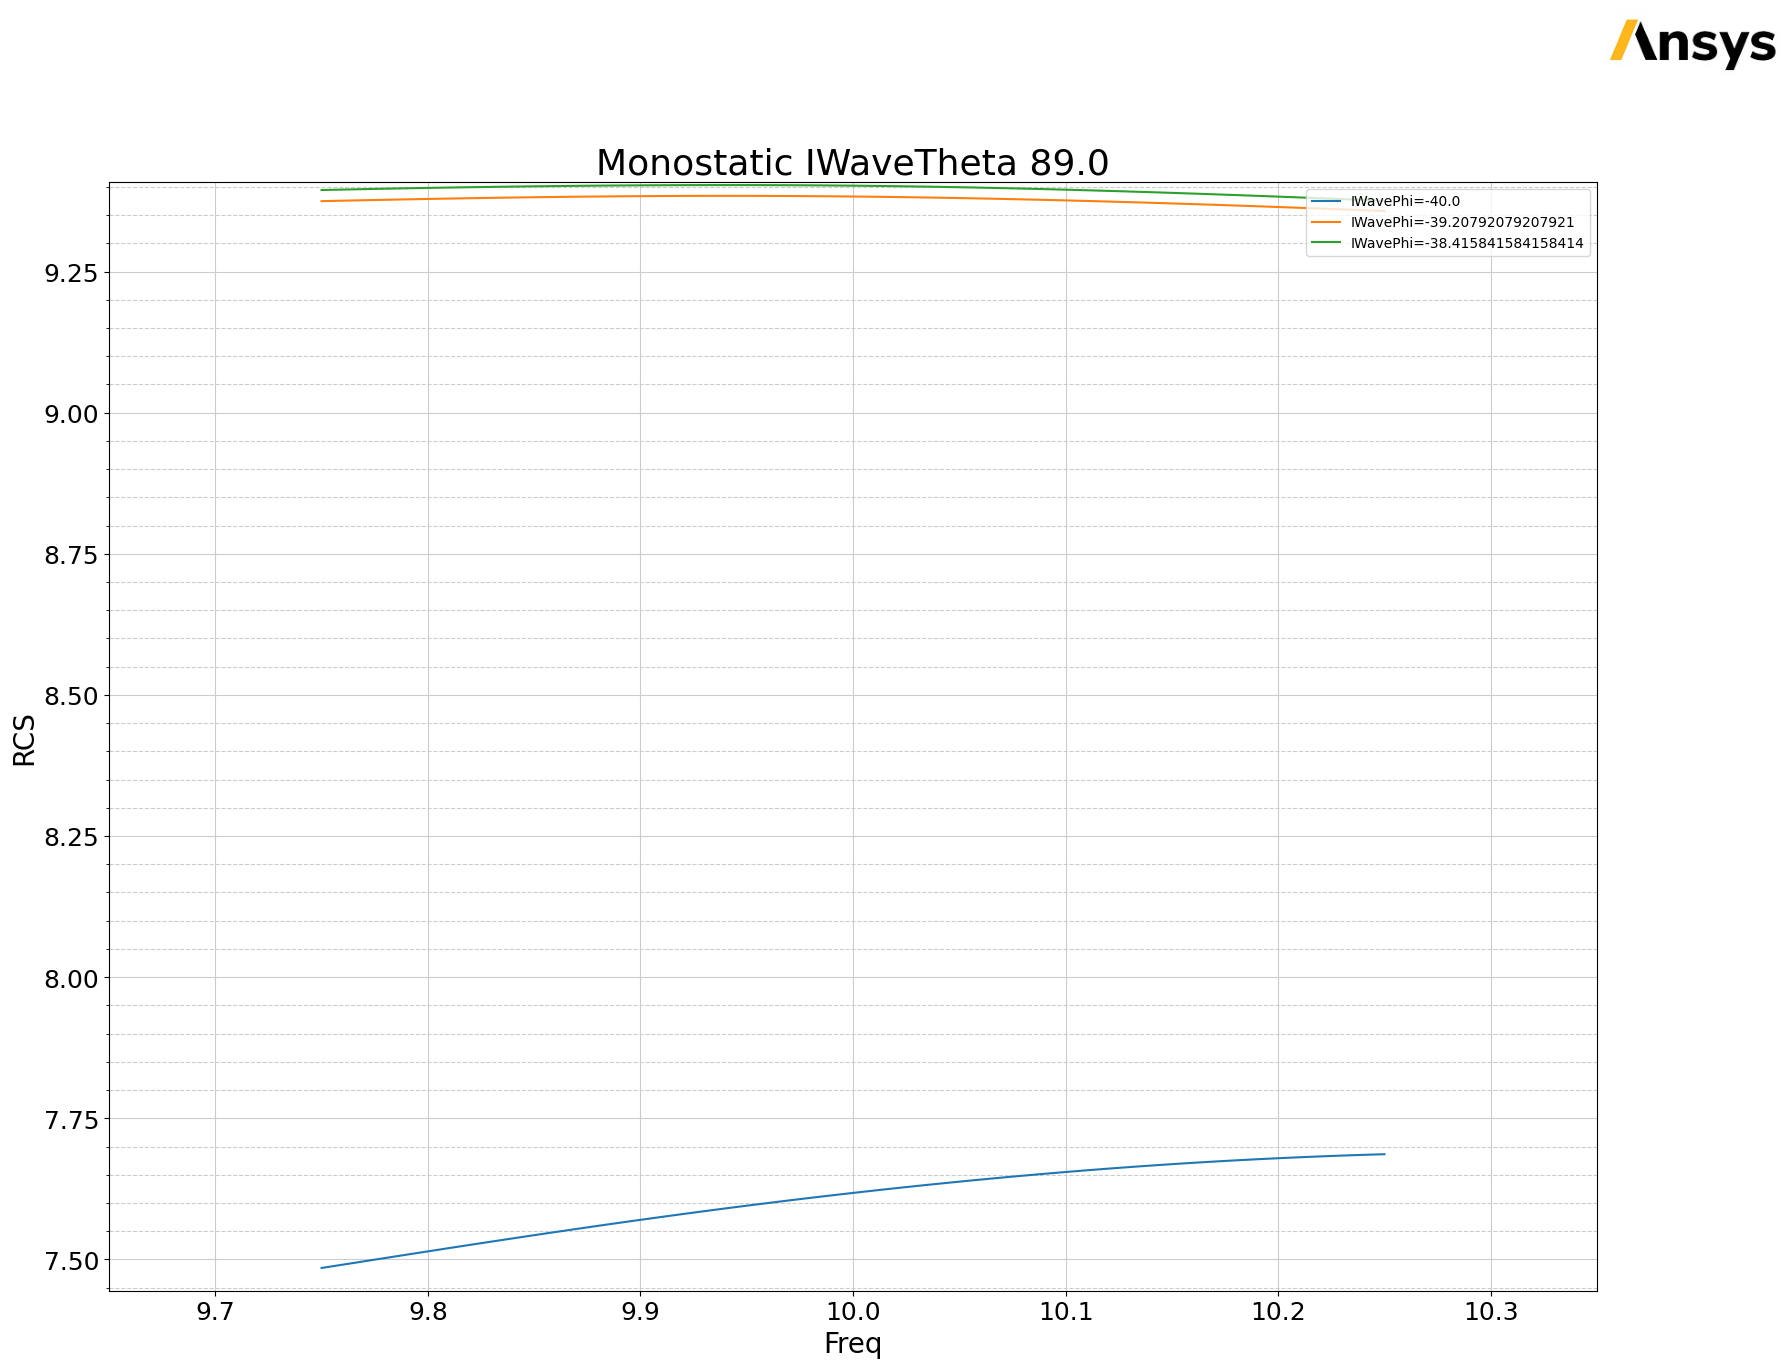

In [16]:
iwavetheta = rcs_data_plotter.rcs_data.incident_wave_theta
secondary_sweep_value = rcs_data_plotter.rcs_data.available_incident_wave_phi[0:3]
rcs_plot_6 = rcs_data_plotter.plot_rcs(
    primary_sweep=primary_sweep,
    secondary_sweep="IWavePhi",
    secondary_sweep_value=secondary_sweep_value,
    title=f"Monostatic IWaveTheta {iwavetheta}",
)

## Plot 3D RCS with Matplotlib

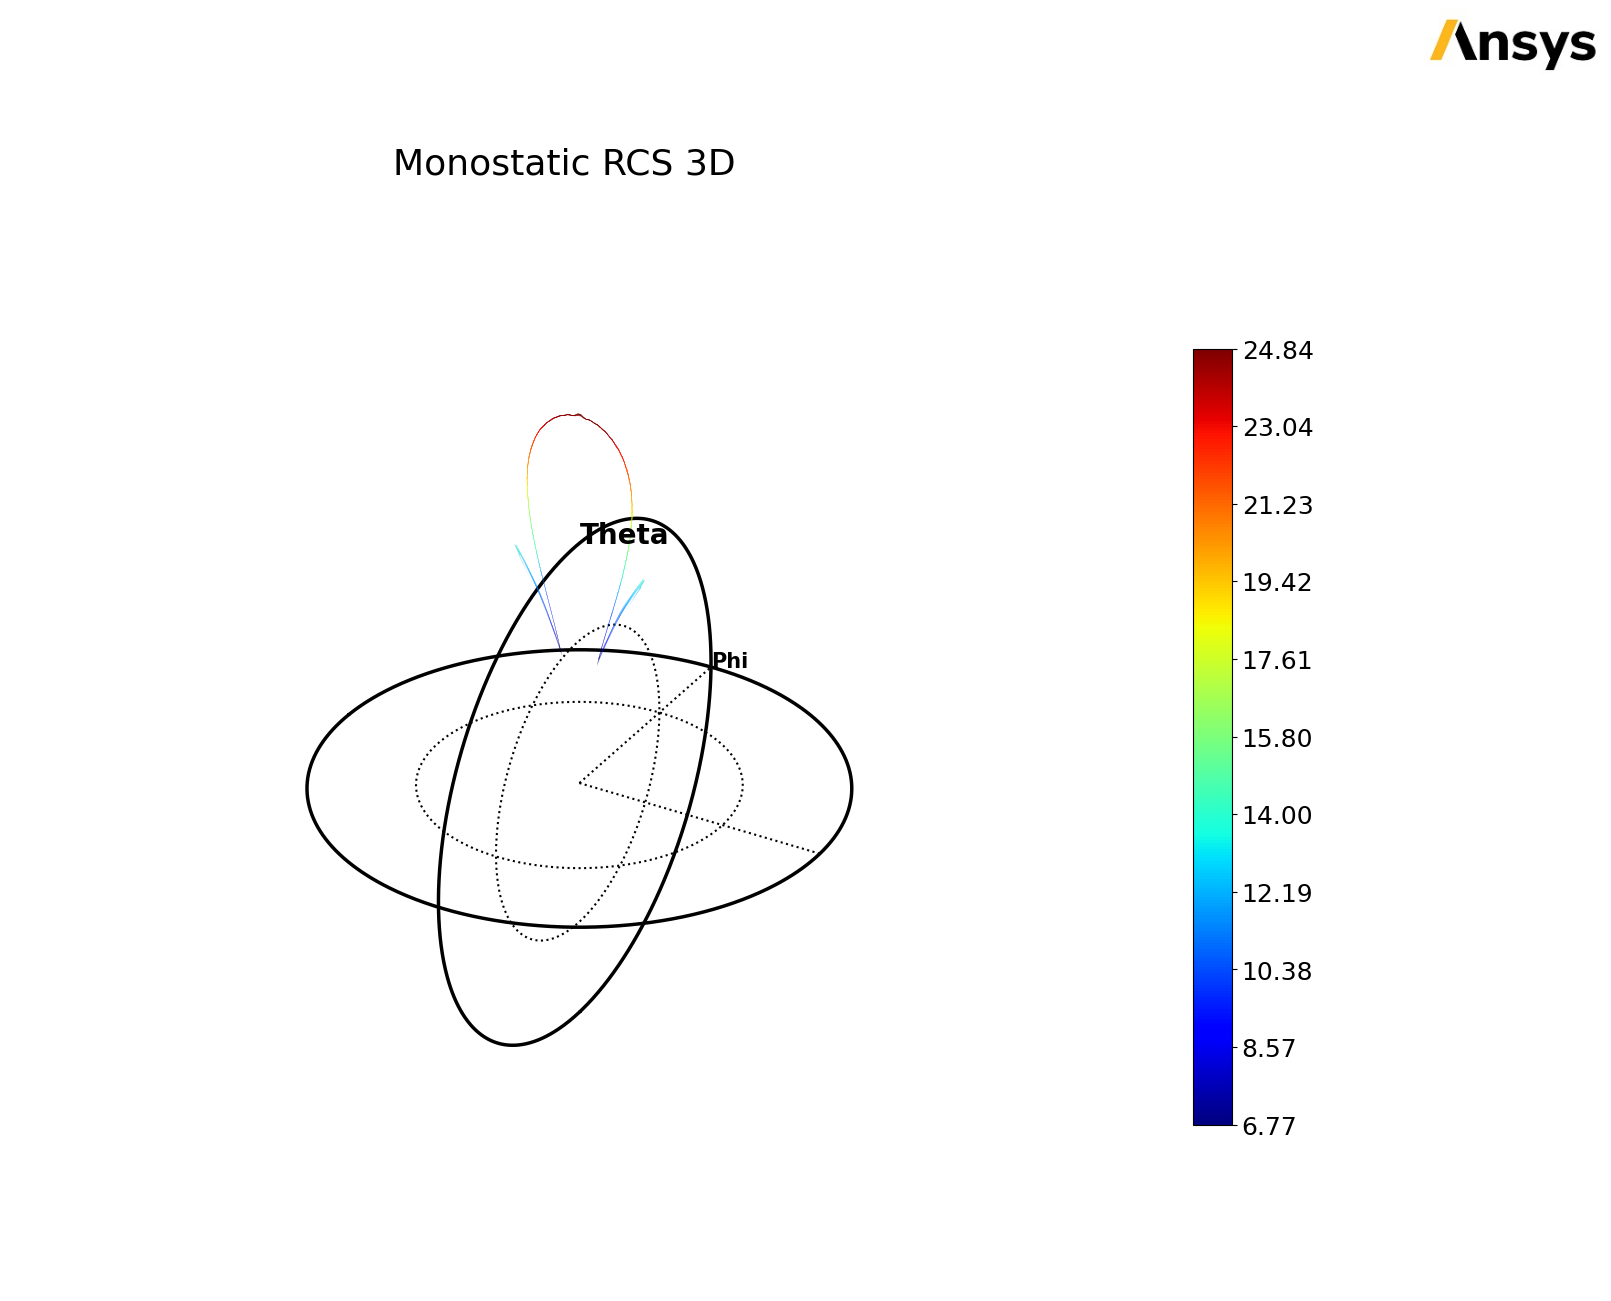

In [17]:
rcs_data_plotter.rcs_data.data_conversion_function = "dB20"
rcs_plot_7 = rcs_data_plotter.plot_rcs_3d(show=True)

## Plot RCS in scene

In [18]:
rcs_data_plotter.rcs_data.data_conversion_function = "dB20"
rcs_data_plotter.clear_scene()
rcs_data_plotter.show_geometry = True
rcs_data_plotter.add_rcs()
rcs_data_plotter.plot_scene()

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html lang=&quot;en-US&quot; dir=&quot;ltr&quot;>\n  …